<a href="https://colab.research.google.com/github/Muthon1/DataScience/blob/main/Deep_Learning_and_Neural_Networks_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
# Load data with error handling
try:
    df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip')  # Skip bad lines using on_bad_lines
except pd.errors.ParserError as e:
    # Extract line number from error message
    line_number = int(re.search(r'row (\d+)', str(e)).group(1))
    print(f"Error encountered at line {line_number}.")
   # Optionally, display a few lines around the problematic line for inspection
    with open('/content/IMDB Dataset.csv', 'r') as f:
        lines = f.readlines()
        for i in range(max(0, line_number - 5), min(len(lines), line_number + 5)):
            print(f"Line {i + 1}: {lines[i].strip()}")


In [7]:
# Explore the data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


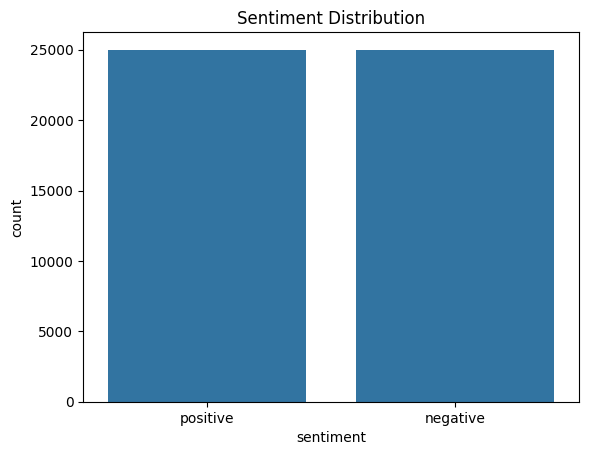

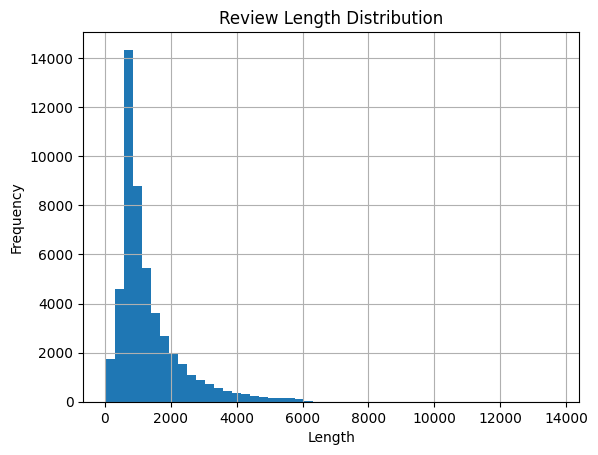

In [12]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Check the length of reviews
df['review_length'] = df['review'].apply(len)
df['review_length'].hist(bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Data preprocessing
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
def preprocess_text(text):
# Convert to lower case
    text = text.lower()
# Remove HTML tags and URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to all reviews
df['clean_review'] = df['review'].apply(preprocess_text)

In [18]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()

# Encode the target variable (sentiment)
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values


In [20]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Create the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8242 - loss: 0.4179 - val_accuracy: 0.8809 - val_loss: 0.2824
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9155 - loss: 0.2151 - val_accuracy: 0.8746 - val_loss: 0.3023
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9333 - loss: 0.1753 - val_accuracy: 0.8669 - val_loss: 0.3185
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9611 - loss: 0.1140 - val_accuracy: 0.8670 - val_loss: 0.3990
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9863 - loss: 0.0430 - val_accuracy: 0.8624 - val_loss: 0.5361
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9975 - loss: 0.0107 - val_accuracy: 0.8651 - val_loss: 0.6816
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.8664 - val_loss: 0.7904
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 1.0000 - loss: 0.0012 - val_ac

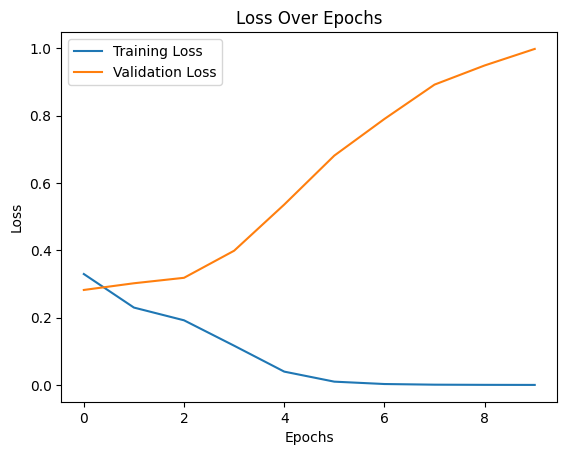

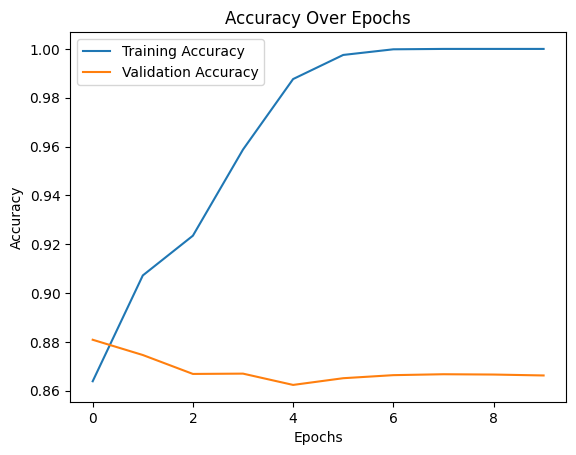

In [23]:
# Training the model
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Report
- After training the model, we observe the accuracy on the test set, which can give us an indication of how well the model generalizes to unseen data
- Loss and accuracy curves allow us to monitor overfitting or underfitting.
# Challenges
- Handling noisy data (HTML tags, URLs) can be tricky, and ensuring all stop words are removed appropriately is crucial.
# Potential improvements
- Consider lemmatization or stemming to further reduce dimensionality of the text data.